<a href="https://colab.research.google.com/github/ik-okoro/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Chi2_Tests_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi-square Tests

###Dataset description:

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film. To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not1. The data appears in the Slasher.csv dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773

You can find the Slasher.csv file here:

<https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv>





### 1) Load the Slasher.csv dataset in a new dataframe.



In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load dataframe
url ="https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv"

df = pd.read_csv(url)

df.shape

(485, 4)

###2) Display the top 5 rows of the dataframe to take a look at the variable names and values.

In [3]:
df.head()

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


The variable codes are:

ID = Character ID

Gender = Character gender.  0 = female, 1 = male

Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes

Survival = Character survival in the film. 0 = did not survive, 1 = survived

In [7]:
# Display actual variables in dataframe
df["Gender"] = df["Gender"].replace({0 : "Female", 1 : "Male"})

df["Activity"] = df["Activity"].replace({0 : "No", 1 : "Yes"})

df["Survival"] = df["Survival"].replace({0 : "No", 1 : "Yes"})

df.head()

,ID,Gender,Activity,Survival
0,1,Male,Yes,Yes
1,2,Male,Yes,Yes
2,3,Male,Yes,Yes
3,4,Male,Yes,Yes
4,5,Male,Yes,Yes


###3) Calculate the frequency and relative frequency of male and female characters in this set of slasher films.  Describe your results in a sentence or two.

In [8]:
# Frequency crosstab of gender

sex = pd.crosstab(index = df["Gender"], columns = "Count")

sex

col_0,Count
Gender,
Female,263
Male,222


In [9]:
# Relative frequency

sex/sex.sum()*100

col_0,Count
Gender,
Female,54.226804
Male,45.773196


There is a slightly higher sampling of female characters from the slasher films.

###4) Calculate the frequency and relative frequency of character survival in this set of slasher films.  Describe your results in a sentence or two.

In [10]:
# Frequency crosstab pertaining to survival

survived = pd.crosstab(index = df["Survival"], columns = "Count")

survived

col_0,Count
Survival,
No,400
Yes,85


In [11]:
survived/survived.sum()*100

col_0,Count
Survival,
No,82.474227
Yes,17.525773


82.5% of all the characters sampled did not survive by the end of the film.

###5) Calculate the joint distribution of character sex and movie survival. Add the table margins.  

Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [33]:
# Joint distribution showing totals

pd.crosstab(df["Gender"], df["Survival"], margins = True)

Survival,No,Yes,All
Gender,,,
Female,228,35,263
Male,172,50,222
All,400,85,485


Shows more females died than males overall

###6) Calculate the distribution of survival conditional on character sex.
Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [16]:
# Conditional distribution

pd.crosstab(df["Gender"], df["Survival"], normalize="index")*100

Survival,No,Yes
Gender,,
Female,86.692015,13.307985
Male,77.477477,22.522523


Higher percentage of females did not survive by the end of the movie. 87% to the males' 77%

###7) Identify the appropriate null and alternative hypotheses to test for a statistically significant relationship between character sex and survival. 

**Ho:** There is no relationship between gender and character survival.

**Ha:** There is a relationship between gender and character survival.

### 8) Perform the chi-square test above using `stats.chi2_contingency()` and output the p-value.


In [19]:
# Chi-squared calculation
stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(df["Gender"], df["Survival"]))

[stat, p]

[6.448486105276048, 0.011104692591139975]

### 9) Interpret your p-value in 8) at the 0.05 significance level, and summarize your results in a sentence or two.

With a p-value of 0.011, I reject the null hypothesis that there is no relationship between character sex and survival with 95% certainty.



### 10) Create a side-by-side bar plot to illuatrate the relationship between character sex and survival in Slasher movies.  Sum up your overall results in a sentence or two.

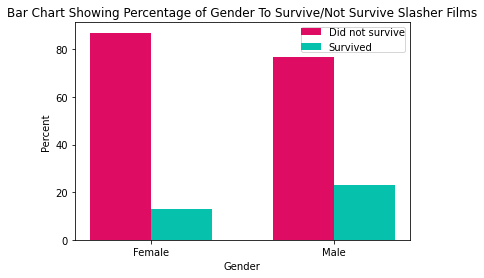

In [29]:
# Bar plot

n = 2

died = (87, 77)
survive = (13, 23)

ind = np.arange(n)
width = np.min(np.diff(ind))/3

fig,ax = plt.subplots()

# Customize bars
death = ax.bar(ind, died, width, color = "#de0c62")
life = ax.bar(ind + width, survive, width, color = "#06c2ac")

# Customize other parameters
ax.set_xlabel("Gender")
ax.set_ylabel("Percent")

ax.set_title("Bar Chart Showing Percentage of Gender To Survive/Not Survive Slasher Films")

ax.set_xticks(ind + width/2)

ax.set_xticklabels(("Female", "Male"))

ax.legend((death[0], life[0]), ("Did not survive", "Survived"), loc = 1, borderpad = 0.0)

plt.show()

Although higher percentage of both genders do not survive by the end of the film, more females are do not survive in relation to males.

## Stretch Goals:

###1. Explore the concept of an odds ratio

Another way to quantify the relationship between two categorical variables is by calculating the odds ration, which is the ratio of the odds of an event happening in one group to the odds of the event happening in another group.

[Lots more about the odds ratio](https://en.wikipedia.org/wiki/Odds_ratio).

We can use Python to calculate the odds of surviving a slaser movie for female compared to male characters.

You can find more information about calculating the odds ratio for a 2x2 table in Python [here](https://www.statsmodels.org/stable/contingency_tables.html).  Scroll down to the section labeled "A Single 2x2 Table".

Calculate the odds ratio comparing the odds of movie survival in female compared to male characters.  Interpret what this number tells you about the likelihood of male and female characters surviving the film.


In [39]:
import statsmodels.api as sm
import pandas.util.testing as tm

sm.stats.Table2x2(pd.crosstab(df["Gender"], df["Survival"]).to_numpy()).summary()


,Estimate,SE,LCB,UCB,p-value
Odds ratio,1.894,,1.177,3.046,0.008
Log odds ratio,0.639,0.242,0.163,1.114,0.008
Risk ratio,1.119,,1.027,1.219,0.010
Log risk ratio,0.112,0.044,0.027,0.198,0.010


With an odds ratio greater than 1, I can infer that the odds of a female character not surviving a slasher film is greater than a male's. Almost 2x!


### 2. Learn about Simpson's Paradox

[Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20goes%20by,when%20these%20groups%20are%20combined.) occurs when a trend that appears in separate groups disappears or reverses when those groups are combined.  

Create a scenario where Hopsital A has a lower overall mortality rate than Hospital B but has a higher mortality rate if cases are separated into two groups: high risk and low risk.


In [ ]:
# YOUR WORK HERE

Sum up your results in a sentence or two.